In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)
import os

In [2]:
data = pd.read_csv('../data/iris_data.csv')
data.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal-length    150 non-null float64
sepal-width     150 non-null float64
petal-length    150 non-null float64
petal-width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


# EDA

In [12]:
def plot_distribution(feature):
    sns.displot(x=feature, data=data, kde=True, color='#244747');
    plt.figtext(0.2, 1, '%s Distribution'%feature, fontfamily='serif', fontsize=17, fontweight='bold');
    
def plot_num_cat(feature, target, figsize=None):
    fig = plt.figure(figsize=(8,4))

    for value in data[target].unique():
        sns.kdeplot(data[data[target]==value][feature])

    fig.legend(labels=data[target].unique())
    plt.title('{} distribution based on {}'.format(feature, target))
    plt.show()

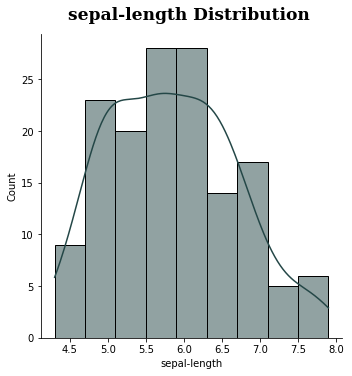

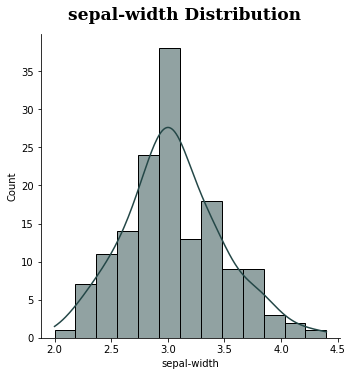

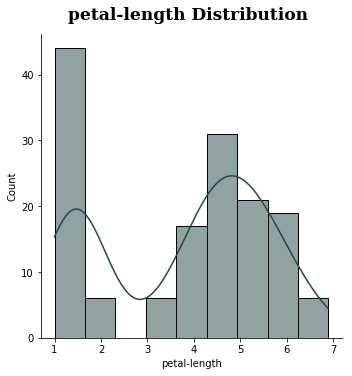

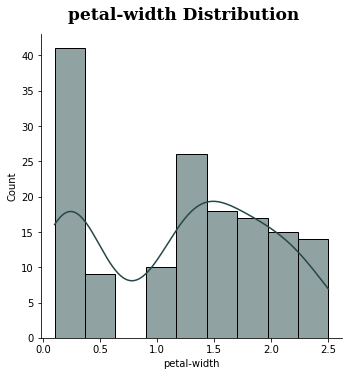

In [13]:
for feature in ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']:
    plot_distribution(feature)

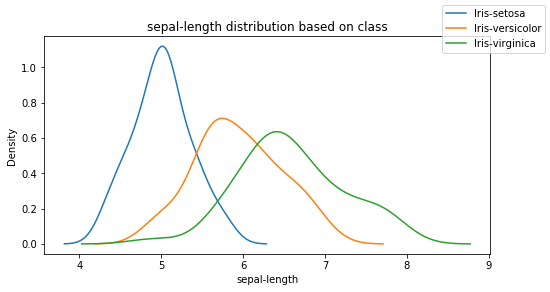

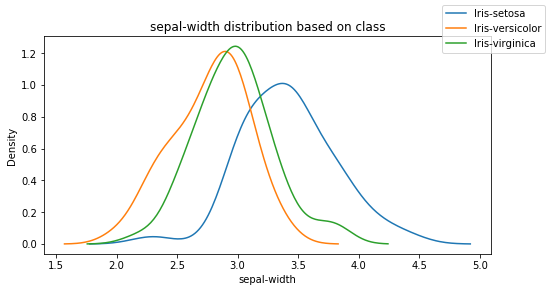

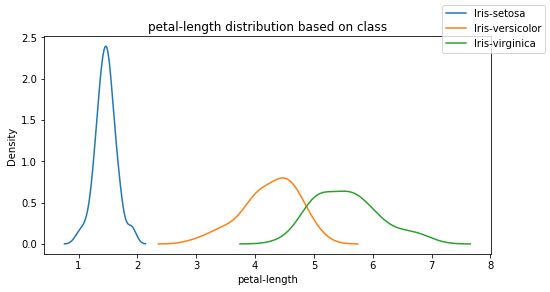

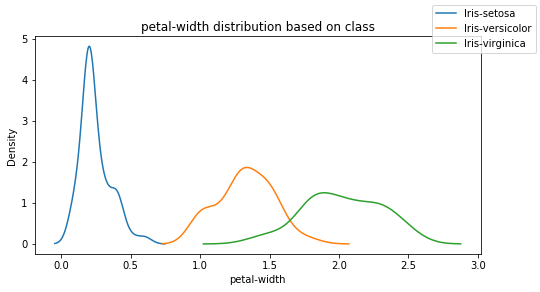

In [14]:
for feature in ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']:
    plot_num_cat(feature, 'class', figsize=None)

# Training ML Model

In [74]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering 
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering 
from sklearn.cluster import DBSCAN
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [124]:
feature_cols = [feature for feature in data.columns if feature not in(['class', 'cluster'])]
train_data = data.copy()[feature_cols]
print('features used- ', feature_cols)

features used-  ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']


In [137]:
data['class'] = data['class'].map({'Iris-virginica':2, 'Iris-setosa':1, 'Iris-versicolor':0})

In [128]:
# rescaling data
scale = StandardScaler()
train_data = scale.fit_transform(train_data)

# Model 1: KMeans

### Using ELBOW Method to figure out number of clusters
The idea behind elbow method is to run k-means clustering on a given dataset for a range of values of k (e.g k=1 to 10), for each value of k, calculate sum of squared errors (SSE).<br>
Calculate the mean distance between data points and their cluster centroid. Increasing the number of clusters(K) will always reduce the distance to data points, thus decrease this metric, to the extreme of reaching zero when K is as same as the number of data points. So the goal is to choose a small value of k that still has a low SSE.<br>
We run the algorithm for different values of K(say K = 1 to 10) and plot the K values against SSE(Sum of Squared Errors). And select the value of K for the elbow point.

### Silhouette score concept:
* Silhouette score for a set of sample data points is used to measure how dense and well-separated the clusters are.
* Silhouette score takes into consideration the intra-cluster distance between the sample and other data points within the same cluster (a) and inter-cluster distance between the sample and the next nearest cluster (b).
* The silhouette score falls within the range [-1, 1].
* The silhouette score of 1 means that the clusters are very dense and nicely separated. The score of 0 means that clusters are overlapping. The score of less than 0 means that data belonging to clusters may be wrong/incorrect.
* The silhouette plots can be used to select the most optimal value of the K (no. of cluster) in K-means clustering.
* The aspects to look out for in Silhouette plots are cluster scores below the average silhouette score, wide fluctuations in the size of the clusters, and also the thickness of the silhouette plot.

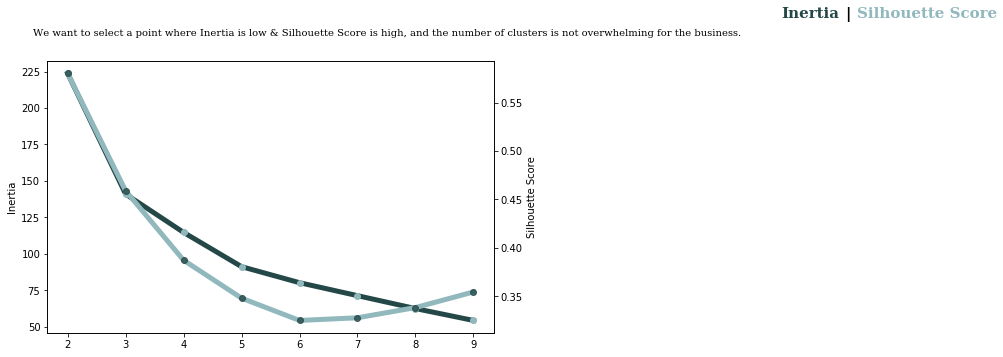

In [129]:
inertia=[]
silhouetteScore = []
n_clusters = 10
for i in range(2, n_clusters):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(train_data)
    inertia.append(kmeans.inertia_)
    silhouetteScore.append(silhouette_score(train_data, kmeans.predict(train_data)))

fig, ax1 = plt.subplots(figsize=(8, 5))
#fig.text(0.1, 1, 'Skipping ', fontfamily='serif', fontsize=12, fontweight='bold')
fig.text(0.1, 0.95, 'We want to select a point where Inertia is low & Silhouette Score is high, and the number of clusters is not overwhelming for the business.',
         fontfamily='serif',fontsize=10)
fig.text(1.4, 1, 'Inertia', fontweight="bold", fontfamily='serif', fontsize=15, color='#244747')
fig.text(1.51, 1, "|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(1.53, 1, 'Silhouette Score', fontweight="bold", fontfamily='serif', fontsize=15, color='#91b8bd')

ax1.plot(range(2, n_clusters), inertia, '-', color='#244747', linewidth=5)
ax1.plot(range(2, n_clusters), inertia, 'o', color='#91b8bd')
ax1.set_ylabel('Inertia')

ax2 = ax1.twinx()
ax2.plot(range(2, n_clusters), silhouetteScore, '-', color='#91b8bd', linewidth=5)
ax2.plot(range(2, n_clusters), silhouetteScore, 'o', color='#244747', alpha=0.8)
ax2.set_ylabel('Silhouette Score')

plt.xlabel('Number of clusters')
plt.show()

In [130]:
model = KMeans(n_clusters=3, init='k-means++', random_state=0, algorithm='elkan')
y = model.fit_predict(train_data)

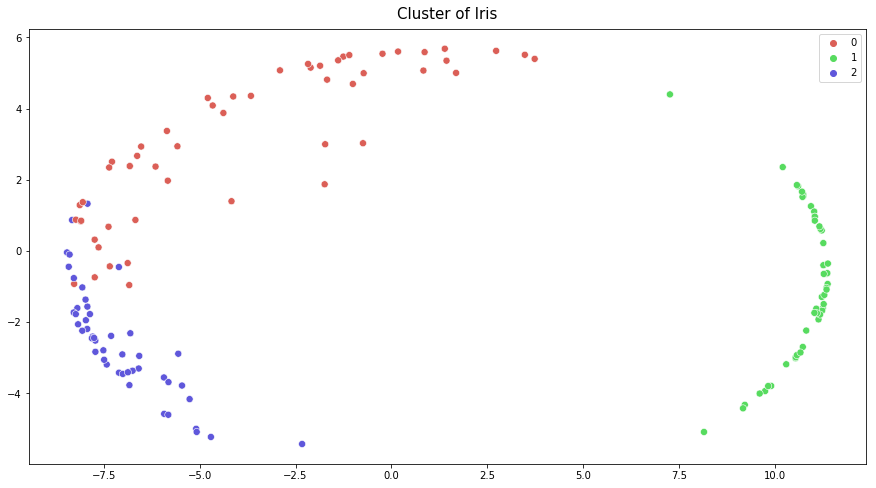

In [139]:
dist = 1-cosine_similarity(train_data)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)

# Visualizing all the clusters 
plt.figure(figsize=(15,8))
sns.scatterplot(x=X_PCA[:, 0], y=X_PCA[:, 1], 
                hue=y, palette=sns.color_palette('hls', model.cluster_centers_.shape[0]), s=50)
plt.title('Cluster of Iris', size=15, pad=10)
plt.legend(loc=0, bbox_to_anchor=[1,1])
plt.show()

In [80]:
# if petal-width is removed then we can plot this 3D plot
fig = px.scatter_3d(pd.DataFrame(train_data, columns=feature_cols), x=feature_cols[0], y=feature_cols[1], z=feature_cols[2],
                    color=y, opacity=0.8, size=y+1)
fig.show()

## Model Interpretations

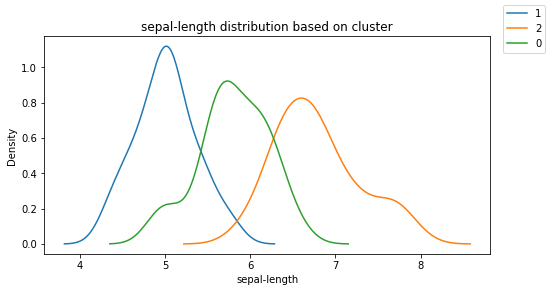

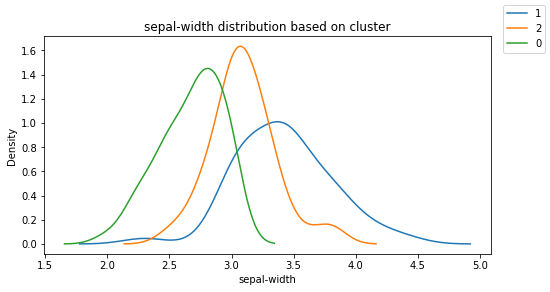

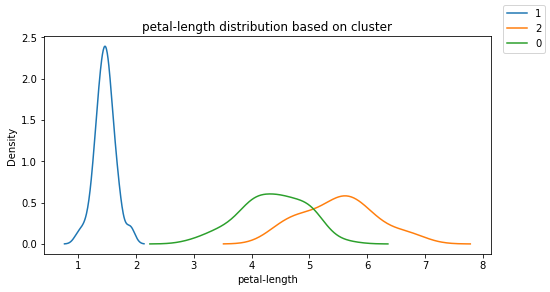

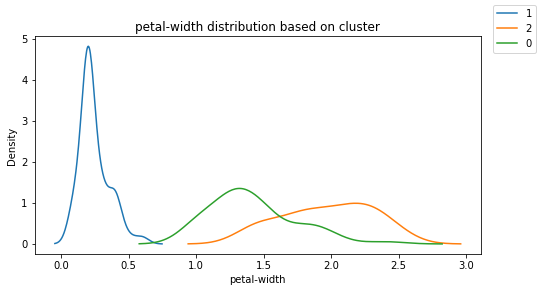

In [132]:
data['cluster'] = y
for feature in feature_cols:
    plot_num_cat(feature, 'cluster')

In [138]:
print('Train metrics...')
print(confusion_matrix(data['class'], y))
print(classification_report(data['class'], y))

Train metrics...
[[39  0 11]
 [ 0 50  0]
 [14  0 36]]
              precision    recall  f1-score   support

           0       0.74      0.78      0.76        50
           1       1.00      1.00      1.00        50
           2       0.77      0.72      0.74        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



# Model 2: Hierarchical Clustering
Hierarchical clustering, as the name suggests is an algorithm that builds hierarchy of clusters. This algorithm starts with all the data points assigned to a cluster of their own. Then two nearest clusters are merged into the same cluster. In the end, this algorithm terminates when there is only a single cluster left.
	
The results of hierarchical clustering can be shown using dendrogram. The dendrogram can be interpreted as:
![image1.png](image1.png)
At the bottom, we start with 25 data points, each assigned to separate clusters. Two closest clusters are then merged till we have just one cluster at the top. The height in the dendrogram at which two clusters are merged represents the distance between two clusters in the data space.<br>
The decision of the no. of clusters that can best depict different groups can be chosen by observing the dendrogram. The best choice of the no. of clusters is the no. of vertical lines in the dendrogram cut by a horizontal line that can transverse the maximum distance vertically without intersecting a cluster.<br>
In the above example, the best choice of no. of clusters will be 4 as the red horizontal line in the dendrogram below covers maximum vertical distance AB.
![image2.png](image2.png)
Two important things that you should know about hierarchical clustering are:
* Agglomerative : This is a "bottom-up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy as done above. performance O(n3)
* Divisive : This is a "top-down" approach: all observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.
* The decision of merging two clusters is taken on the basis of closeness of these clusters. There are multiple metrics for deciding the closeness of two clusters :
    * Euclidean distance: ||a-b||2 = √(Σ(ai-bi))
    * Squared Euclidean distance: ||a-b||22 = Σ((ai-bi)2)
    * Manhattan distance: ||a-b||1 = Σ|ai-bi|
    * Maximum distance: ||a-b||INFINITY = maxi|ai-bi|
    * Mahalanobis distance: √((a-b)T S-1 (-b))   {where, s : covariance matrix}

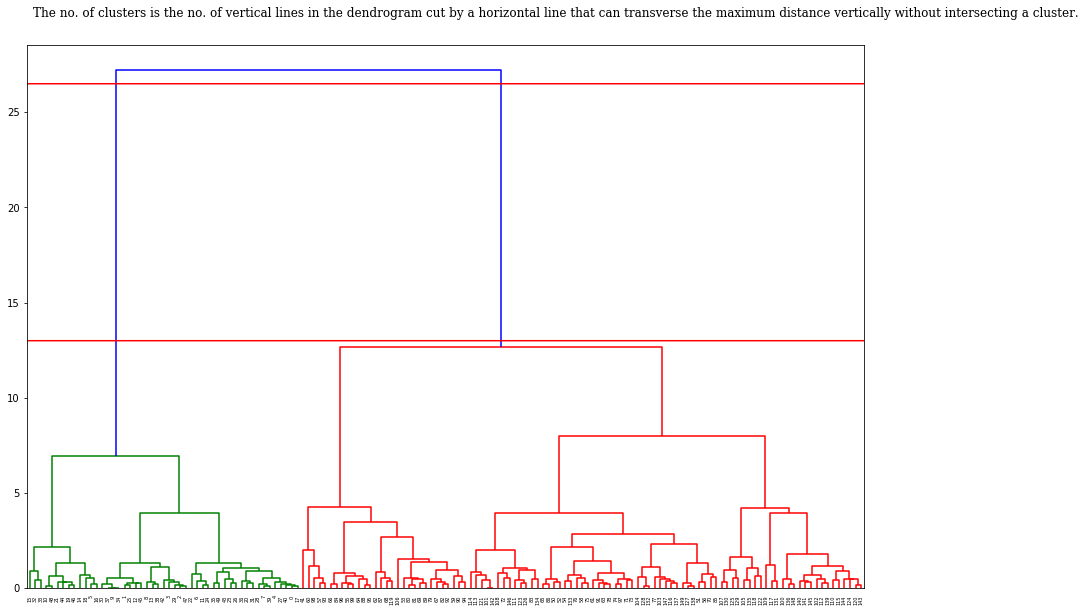

In [142]:
plt.figure(figsize = (15, 10))
plt.text(10, 30, 'The no. of clusters is the no. of vertical lines in the dendrogram cut by a horizontal line that can transverse the maximum distance vertically without intersecting a cluster.',
         fontfamily='serif',fontsize=12)
dendo = dendrogram(linkage(train_data, method='ward'))
plt.plot([13]*20000, color='r')
plt.plot([26.5]*20000, color='r')
plt.show()

In [143]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y = model.fit_predict(train_data)

In [144]:
dist = 1-cosine_similarity(train_data)

pca = PCA(3)
pca.fit(dist)
X_PCA = pca.transform(dist)

# Visualizing all the clusters 
fig = px.scatter_3d(x=X_PCA[:,0], y=X_PCA[:,1], z=X_PCA[:,2],
                    color=y, opacity=0.8)
fig.show()

# Model 3: Gaussian Mixture
Gaussian mixture models can be used to cluster unlabeled data in much the same way as k-means. There are, however, a couple of advantages to using Gaussian mixture models over k-means.<br>
k-means does not account for variance(width of the bell shape curve). In two dimensions, variance/ covariance determines the shape of the distribution.
![image3.png](image3.png)
k-means model places a circle (or, in higher dimensions, a hyper-sphere) at the center of each cluster, with a radius defined by the most distant point in the cluster.
![image4.png](image4.png)
This works fine for when data is circular. However, when data takes on different shape, we end up with something like this.
![image5.png](image5.png)
In contrast, Gaussian mixture models can handle even very oblong clusters.
![image6.png](image6.png)
K-means performs hard classification whereas GMM performs soft classification, i.e. in k-means, data point is deterministically assigned to one and only one cluster, but in reality there may be overlapping between the cluster GMM provide us the probabilities of the data point belonging to each of the possible clusters<br><br>
**Gaussian Mixture Models At A Glance**<br> 
As the name implies, a Gaussian mixture model involves the mixture (i.e. superposition) of multiple Gaussian distributions. Here rather than identifying clusters by “nearest” centroids, we fit a set of k gaussians to the data. And we estimate gaussian distribution parameters such as mean and Variance for each cluster and weight of a cluster. After learning the parameters for each data point we can calculate the probabilities of it belonging to each of the clusters.
![image7.png](image7.png)
Every distribution is multiplied by a weight ππ(π1+π2+π3=1π1+π2+π3=1) to account for the fact that we do not have an equal number of samples from each category. In other words, we might only have included 1000 people from the red cluster class and 100,000 people from the green cluster class

In [145]:
# Number of clusters is determined using elbow method above
# here -1 value in y will denote noise
model = GaussianMixture(n_components=3)
y = model.fit_predict(train_data)

In [146]:
dist = 1-cosine_similarity(train_data)

pca = PCA(3)
pca.fit(dist)
X_PCA = pca.transform(dist)

# Visualizing all the clusters 
fig = px.scatter_3d(x=X_PCA[:,0], y=X_PCA[:,1], z=X_PCA[:,2],
                    color=y, opacity=0.8)
fig.show()

## Model Interpretations

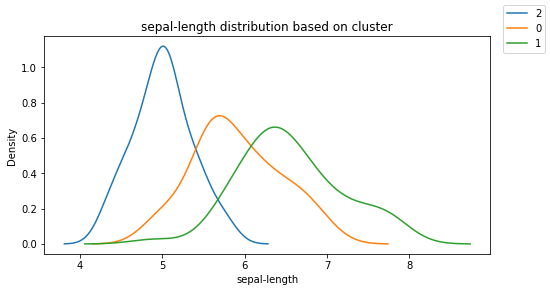

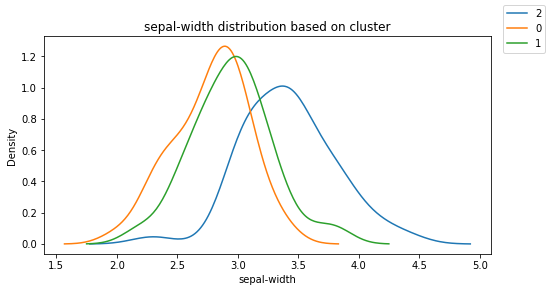

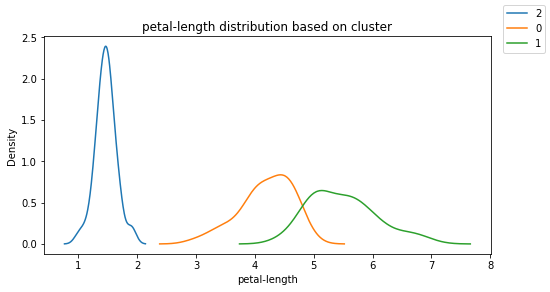

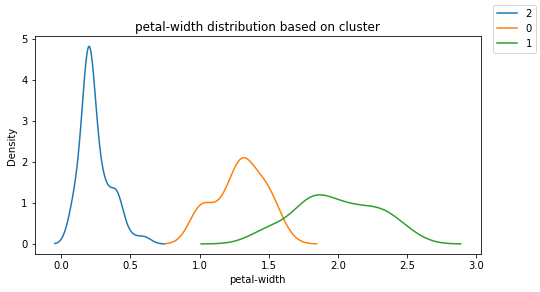

In [147]:
data['cluster'] = y
for feature in feature_cols:
    plot_num_cat(feature, 'cluster')

In [151]:
print('Train metrics...')
print(confusion_matrix(data['class'].map({2:1, 0:0, 1:2}), y))
print(classification_report(data['class'].map({2:1, 0:0, 1:2}), y))

Train metrics...
[[45  5  0]
 [ 0 50  0]
 [ 0  0 50]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        50
           1       0.91      1.00      0.95        50
           2       1.00      1.00      1.00        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



# Model 4: Spectral Clustering
**Spectral Clustering vs. Kmeans **
* <u>**Compactness**</u> — Points that lie close to each other fall in the same cluster and are compact around the cluster center. The closeness can be measured by the distance between the observations. E.g.: **K-Means Clustering**
* <u>**Connectivity**</u> — Points that are connected or immediately next to each other are put in the same cluster. Even if the distance between 2 points is less, if they are not connected, they are not clustered together. **Spectral Clustering** is a technique that follows this approach.
![image8.png](image8.png)
Datasets where spectral clustering is applied for clustering:
![image9.png](image9.png)
K-means will fail to effectively cluster these, even when the true number of clusters K is known to the algorithm. K-means, as a data-clustering algorithm, ideal for discovering globular clusters where all members of each cluster are in close proximity to each other (in Euclidean sense).<br>
Spectral clustering is more general (and powerful) because if we just use Eucledean Distance in it's similarity matrix, It will behave like k-means. The converse is not true though.

In [152]:
# Building the clustering model 
model = SpectralClustering(n_clusters=3, affinity='rbf') # rbf acts as eucledean distance
  
# Training the model and Storing the predicted cluster labels 
y = model.fit_predict(train_data)

In [153]:
dist = 1-cosine_similarity(train_data)

pca = PCA(3)
pca.fit(dist)
X_PCA = pca.transform(dist)

# Visualizing all the clusters 
fig = px.scatter_3d(x=X_PCA[:,0], y=X_PCA[:,1], z=X_PCA[:,2],
                    color=y, opacity=0.8)
fig.show()

## Model Interpretations

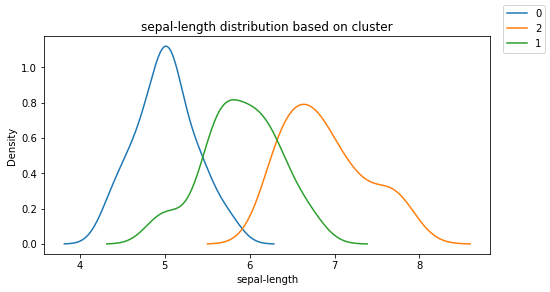

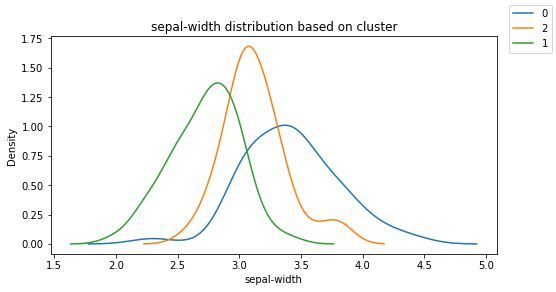

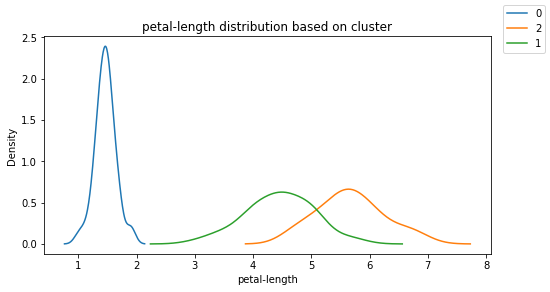

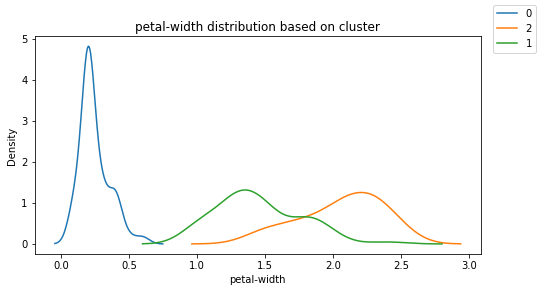

In [154]:
data['cluster'] = y
for feature in feature_cols:
    plot_num_cat(feature, 'cluster')

In [156]:
print('Train metrics...')
print(confusion_matrix(data['class'].map({1:0,2:2,0:1}), y))
print(classification_report(data['class'].map({1:0,2:2,0:1}), y))

Train metrics...
[[50  0  0]
 [ 0 45  5]
 [ 0 18 32]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.71      0.90      0.80        50
           2       0.86      0.64      0.74        50

    accuracy                           0.85       150
   macro avg       0.86      0.85      0.84       150
weighted avg       0.86      0.85      0.84       150



# Model 5: DBSCAN
It groups *densely grouped* data points into a single cluster. It can identify clusters in large spatial datasets by looking at the local density of the data points. The most exciting feature of DBSCAN clustering is that it is robust to outliers. It also does not require the number of clusters to be told beforehand, unlike K-Means, where we have to specify the number of centroids.<br>
DBSCAN requires only two parameters: epsilon and minPoints. Epsilon is the radius of the circle to be created around each data point to check the density and minPoints is the minimum number of data points required inside that circle for that data point to be classified as a Core point.<br>
In higher dimensions the circle becomes hypersphere, epsilon becomes the radius of that hypersphere, and minPoints is the minimum number of data points required inside that hypersphere.

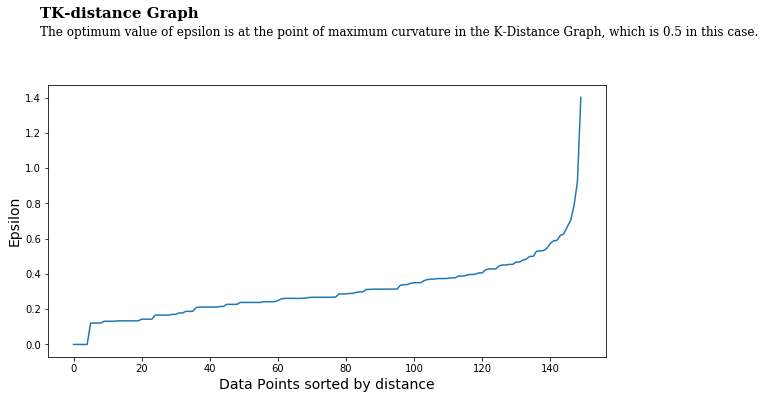

In [158]:
from sklearn.neighbors import NearestNeighbors
# finding nearest points distance for every row in data
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(train_data)
distances, indices = nbrs.kneighbors(train_data)

# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,5))
p=max(distances)+0.5
plt.text(-10, p-0.05, 'TK-distance Graph', fontfamily='serif', fontsize=15, fontweight='bold')
plt.text(-10, p-0.15, 'The optimum value of epsilon is at the point of maximum curvature in the K-Distance Graph, which is 0.5 in this case.',
        fontfamily='serif', fontsize=12)
plt.plot(distances)
plt.xlabel('Data Points sorted by distance', fontsize=14)
plt.ylabel('Epsilon', fontsize=14)
plt.show()

In [167]:
# Building the clustering model 
model = DBSCAN(eps=0.5, min_samples=5) 
# here -1 value in y stands for noise
  
# Training the model and Storing the predicted cluster labels 
y = model.fit_predict(train_data)

In [168]:
dist = 1-cosine_similarity(train_data)

pca = PCA(3)
pca.fit(dist)
X_PCA = pca.transform(dist)

# Visualizing all the clusters 
fig = px.scatter_3d(x=X_PCA[:,0], y=X_PCA[:,1], z=X_PCA[:,2],
                    color=y, opacity=0.8)
fig.show()